# At a glance

In [1]:
#| output: false
#| eval: true
#| echo: false

# Load Excel sheet
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

filename = "../../CARD Group Timeline.xlsx"

df = pd.read_excel(filename, sheet_name="People")
df.drop(0, inplace=True)
df.reset_index(inplace=True, drop=True)

names = df['Display Name'].values

# Get the current group members and alumni
current_group_member_indices = df[df.apply( \
    lambda row: row.astype(str).str.contains('current').any(),
      axis=1)].index.tolist()
alumni_indices = df[~df.index.isin(current_group_member_indices)].index.tolist()

current_group_members = df.loc[current_group_member_indices, 'Display Name']
alumni = df.loc[alumni_indices, 'Display Name']

current_index = np.zeros([len(names), 1])
current_index[current_group_member_indices] = 1
alumni_index = np.zeros([len(names), 1])
alumni_index[alumni_indices] = 1
df['current'] = current_index
df['alumni'] = alumni_index
del current_index, alumni_index

/Users/paytone/anaconda3/envs/card-lab/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [2]:
#| echo: false
#| output: true
#| eval: true

import plotly.graph_objects as go
import numpy as np
from IPython.display import HTML

def make_sparkline(data, color="white"):
    """Return Plotly sparkline HTML."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        y=data, mode="lines", line=dict(color=color, width=2)
    ))
    fig.update_layout(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        margin=dict(l=0, r=0, t=0, b=0),
        height=80,
        paper_bgcolor="rgba(0,0,0,0)",
        plot_bgcolor="rgba(0,0,0,0)"
    )
    return fig.to_html(include_plotlyjs=False, full_html=False)

def make_value_box(title, value, icon_name, theme, decimals=1):
    """Return HTML for a value box with an icon."""
    return f"""
    <div class="value-box {theme}">
      <div class="top-row">
        <div class="label">{title}</div>
        <iconify-icon icon="{icon_name}"></iconify-icon>
      </div>
      <div class="value">{value:.{decimals}f}</div>
    </div>
    """


import datetime

dt1 = datetime.datetime(year=2022, month=8, day=15)
dt2 = datetime.datetime.now()
eltime = dt2 - dt1
#print("{0:2.1f} years.".format(eltime.days / 365.25))

total = df[df['current']==True]['Display Name'].count()

#print("{0} students currently working towards degrees.".format(total))


grad = df[df['alumni']==True]['Ultimate Degree-Role'].str.contains('PhD').sum() + df[df['alumni']==True]['Ultimate Degree-Role'].str.contains('MS').sum() + df[df['alumni']==True]['Ultimate Degree-Role'].str.contains('MEng').sum()


# Build multiple boxes
boxes_html = f"""
<div style="display:grid;grid-template-columns:repeat(auto-fit,minmax(280px,1fr));gap:1rem;">
  {make_value_box("Years of activity", eltime.days / 365.25, "fluent-mdl2:calendar-year", "success", decimals=1)}
  {make_value_box("Students currently working toward degrees", total, "fa-solid:user-graduate", "info", decimals=0)}
  {make_value_box("Graduate degrees awarded", grad, "vaadin:diploma-scroll", "warning", decimals=0)}
  {make_value_box("Undergraduates mentored in scientific research",
                  df['Ultimate Degree-Role'].str.contains('BS').sum(), "hugeicons:brain-02", "danger", decimals=0)}
</div>
"""

HTML(boxes_html)

In [3]:
#| eval: true
#| echo: false
#| output: false
#| include: false

import pandas as pd
import plotly.express as px
import numpy as np
from plotly.subplots import make_subplots

filename = "../../CARD Group Timeline.xlsx"

df = pd.read_excel(filename, sheet_name="People")
df.drop(0, inplace=True)
df.reset_index(inplace=True, drop=True)

names = df['Display Name'].values

# Get the current group members and alumni
current_group_member_indices = df[df.apply( \
    lambda row: row.astype(str).str.contains('current').any(),
      axis=1)].index.tolist()
alumni_indices = df[~df.index.isin(current_group_member_indices)].index.tolist()

current_group_members = df.loc[current_group_member_indices, 'Display Name']
alumni = df.loc[alumni_indices, 'Display Name']

current_index = np.zeros([len(names), 1])
current_index[current_group_member_indices] = 1
alumni_index = np.zeros([len(names), 1])
alumni_index[alumni_indices] = 1
df['current'] = current_index
df['alumni'] = alumni_index
del current_index, alumni_index


/Users/paytone/anaconda3/envs/card-lab/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


# Group Roles

In [4]:
#| eval: true
#| echo: false

plots = [
        px.pie(df, names='Ultimate Degree-Role'),
        px.pie(df[df['current']==True], names='Ultimate Degree-Role'),
        px.pie(df[df['alumni']==True], names='Ultimate Degree-Role')
        ]

fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]], subplot_titles=('Since 2022', 'Current', 'Alumni'), horizontal_spacing=0.01)

for i, figure in enumerate(plots):
    for trace in figure.data:
        fig.add_trace(trace, row=1, col=i+1)

# Update the layout to position the legend below the plot
fig.update_layout(
    legend=dict(
        orientation="h",  # Optional: set orientation to horizontal
        yanchor="bottom",    # Anchor the top of the legend to the specified
        y=-0.5,           # Adjust this value to control the vertical position below the plot
        xanchor="center",   # Anchor the left of the legend to the specified x-coordinate
        x=0.5,          # Position the legend at the left edge
        itemsizing='constant', # Ensures consistent legend symbol size
        itemwidth=30, # Sets the width of the legend item (including symbol)
        entrywidthmode="fraction", # Control entry width
        entrywidth=0.5, # Example: each entry takes 50% of legend width, creating two columns
        font=dict(size=8) # Adjust font size if needed for better fit
    )
)

HTML(fig.to_html(include_plotlyjs="cdn", full_html=False))

# Places we have called home

In [5]:
#| eval: true
#| echo: false
#| output: false
#| warning: false
#| error: false

%conda install -y geopy cartopy

'''
TODO:
1. Store locations in Excel sheet
2. Different markers for alumni and current
'''

import pandas as pd
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import itertools

filename = "../../CARD Group Timeline.xlsx"

df = pd.read_excel(filename, sheet_name="People")

# === Step 1: Define our city data ===
cities = []
for i in range(1, 11):
    cities.append(df["Hometown {0}".format(i)].dropna().values)
cities = list(itertools.chain.from_iterable(cities))


# === Step 2: Set up geocoder ===
geolocator = Nominatim(user_agent="city_mapper")

def geocode_with_retry(address, retries=20, delay=5):
    try:
        for attempt in range(retries):
            try:
                return geolocator.geocode(address)
            except GeocoderTimedOut:
                time.sleep(delay)
        return None
    except:
        return None

# === Step 3: Geocode each location ===
lonlat = []
for city in cities:
    query = city.strip(', ')
    print(f"Geocoding: {query}")
    location = geocode_with_retry(query)
    if location:
        lonlat.append([location.longitude, location.latitude])
        print(f" → {location.latitude}, {location.longitude}")
    else:
        print("{query} → Not found.")



Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


/Users/paytone/anaconda3/envs/card-lab/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning:

Data Validation extension is not supported and will be removed



Geocoding: El Lago, TX 77586, USA
 → 29.5710406, -95.0440812
Geocoding: Orsu, IMO State, Nigeria
 → 5.8494268, 6.9828062
Geocoding: Hanumangarh, Rajasthan 335512, India
 → 29.6152878, 74.2903968
Geocoding: Amberpet, Hyderabad, Telangana 500007, India
 → 17.3861775, 78.5114709
Geocoding: Jillalguda, Telangana 500097, India
{query} → Not found.
Geocoding: Alafaya, FL 32828, USA
 → 28.5667957, -81.2076407
Geocoding: Ashuganj, Brahmanbaria, 3402 Bangladesh
 → 24.0369033, 91.0103122
Geocoding: Fresno, CA 93710, USA
 → 36.7394421, -119.78483
Geocoding: Houston, TX 77379, USA
 → 29.7589382, -95.3676974
Geocoding: Lagos 102102, Ikeja, Nigeria
 → 6.5896612, 3.3421976
Geocoding: Ilorin 240101, Kwara, Nigeria
 → 8.4963657, 4.5480484
Geocoding: Anand Vihar, New Delhi, Delhi, 110092, India
 → 28.5786334, 77.1612059
Geocoding: Đà Nẵng 500000, Vietnam
 → 16.068, 108.212
Geocoding: Eti-Osa, Lagos 101222, Lagos, Nigeria
 → 6.4592426, 3.532073
Geocoding: San Diego, CA 92130, USA
 → 32.7174202, -117.1627

/Users/paytone/anaconda3/envs/card-lab/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning:

Data Validation extension is not supported and will be removed



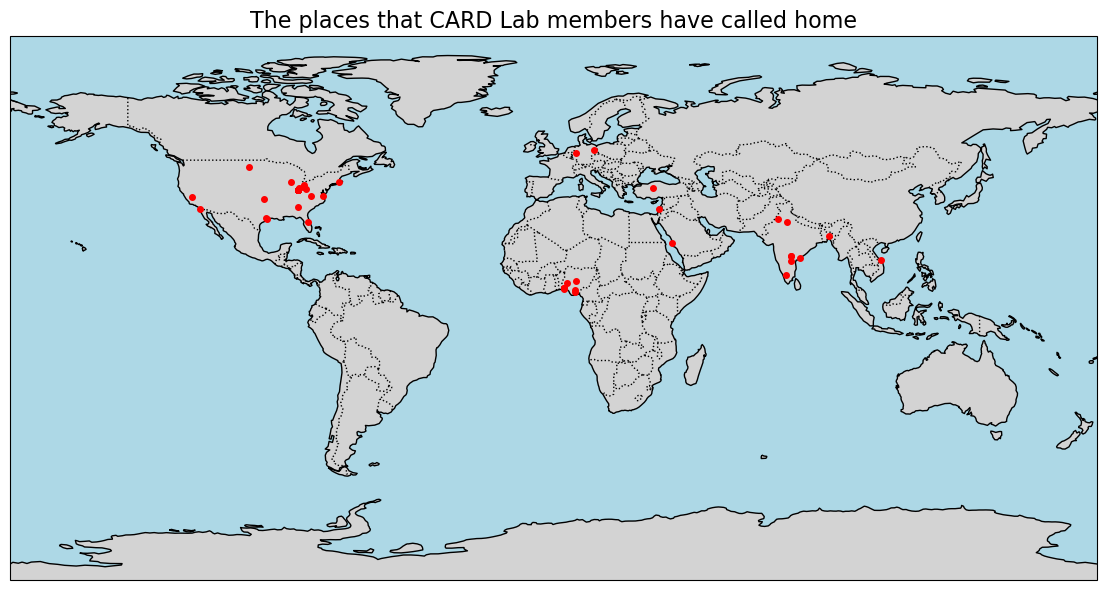

In [6]:
#| eval: true
#| echo: false
#| output: true
#| warning: false
#| error: false

filename = "../../CARD Group Timeline.xlsx"

df = pd.read_excel(filename, sheet_name="People")
df.drop(0, inplace=True)
df.reset_index(inplace=True, drop=True)

names = df['Display Name'].values

# Get the current group members and alumni
current_group_member_indices = df[df.apply( \
    lambda row: row.astype(str).str.contains('current').any(),
      axis=1)].index.tolist()
alumni_indices = df[~df.index.isin(current_group_member_indices)].index.tolist()

current_group_members = df.loc[current_group_member_indices, 'Display Name']
alumni = df.loc[alumni_indices, 'Display Name']

current_index = np.zeros([len(names), 1])
current_index[current_group_member_indices] = 1
alumni_index = np.zeros([len(names), 1])
alumni_index[alumni_indices] = 1
df['current'] = current_index
df['alumni'] = alumni_index
del current_index, alumni_index

# === Step 4: Plot the cities on a world map ===
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.set_title("The places that CARD Lab members have called home", fontsize=16)

# Plot points
for longitude, latitude in lonlat:
    ax.plot(longitude, latitude, marker='o', color='red', markersize=4, transform=ccrs.PlateCarree())
plt.tight_layout()
plt.show()

# Nationality

In [7]:
#| eval: true
#| echo: false

plots = [
        px.pie(df, names='Nationality'),
        px.pie(df[df['current']==True], names='Nationality'),
        px.pie(df[df['alumni']==True], names='Nationality')
        ]

fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]], subplot_titles=('Since 2022', 'Current', 'Alumni'))

for i, figure in enumerate(plots):
    for trace in figure.data:
        fig.add_trace(trace, row=1, col=i+1)

# Update the layout to position the legend below the plot
fig.update_layout(
    legend=dict(
        orientation="h",  # Optional: set orientation to horizontal
        yanchor="top",    # Anchor the top of the legend to the specified y-coordinate
        y=-0.3,           # Adjust this value to control the vertical position below the plot
        xanchor="left",   # Anchor the left of the legend to the specified x-coordinate
        x=0     ,          # Position the legend at the left edge
        tracegroupgap=10,  # Optional: add some space between legend groups
        # To achieve two columns and word wrap, you'll need to control
        # the overall width and rely on the legend items to wrap naturally
        # if their combined width exceeds the available space.
        # There isn't a direct 'columns=2' property for legends in Plotly.
        # Instead, you control the legend's overall dimensions.
        itemwidth=30,     # Set a fixed width for each legend item
        itemsizing="constant", # Keep item width constant
        font=dict(size=10) # Adjust font size if needed for better fit
    )
)

HTML(fig.to_html(include_plotlyjs="cdn", full_html=False))

# Gender Distribution

In [8]:
#| eval: true
#| echo: false
#| output: true
#| include: true

plots = [px.pie(df, names='Gender'),
        px.pie(df[df['current']==True], names='Gender'),
        px.pie(df[df['alumni']==True], names='Gender')]

fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]], subplot_titles=('Since 2022', 'Current', 'Alumni'))

for i, figure in enumerate(plots):
    for trace in figure.data:
        fig.add_trace(trace, row=1, col=i+1)

HTML(fig.to_html(include_plotlyjs="cdn", full_html=False))